In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive

%matplotlib inline

In [2]:
cust_json = "customer_n_s.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 485.3619964 9.707239928


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 2

In [4]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
conv_rate:  []
conv rate: [0.25, 0.25, 0.5714285714285714, 0.75, 0.1111111111111111]
conv_rate:  []
conv rate: [0.25, 0.25, 0.5714285714285714, 0.75, 0.1111111111111111]
conv_rate:  []
conv rate: [0.25, 0.25, 0.5714285714285714, 0.75, 0.1111111111111111]
conv_rate:  []
conv rate: [0.25, 0.25, 0.5714285714285714, 0.75, 0.1111111111111111]
conv_rate:  []
conv rate: [0.25, 0.25, 0.5714285714285714, 0.75, 0.1111111111111111]
[3, 2, 3, 3, 2]
conv_rate:  [0.25]
conv rate: [0.2777777777777778, 0.3125, 0.25, 0.0, 0.25]
conv_rate:  []
conv rate: [0.2777777777777778, 0.3125, 0.25, 0.0, 0.25]
conv_rate:  [0.5714285714285714]
conv rate: [0.2777777777777778, 0.3125, 0.25, 0.0, 0.25]
conv_rate:  [0.75]
conv rate: [0.2777777777777778, 0.3125, 0.25, 0.0, 0.25]
abrupt change
conv_rate:  []
conv rate: [0.2777777777777778, 0.3125, 0.25, 0.0, 0.25]
[3, 3, 3, 2, 2]
conv_rate:  [0.25, 0.2777777777777778]
conv rate: [0.05555555555555

[3, 2, 1, 2, 2]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814]
conv rate: [0.125, 0.3333333333333333, 0.375, 0.8, 0.14285714285714285]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5]
conv rate: [0.125, 0.3333333333333333, 0.375, 0.8, 0.14285714285714285]
conv_rate:  [0.6666666666666666, 0.5714285714285714]
conv rate: [0.125, 0.3333333333333333, 0.375, 0.8, 0.14285714285714285]
conv_rate:  [0.2, 0.4444444444444444, 0.6, 0.75, 0.5, 0.5, 0.5714285714285714]
conv rate: [0.125, 0.3333333333333333, 0.375, 0.8, 0.14285714285714285]
conv_rate:  [0.25, 0.38461538461538464, 0.4, 0.38461538461538464]
conv rate: [0.125, 0.3333333333333333, 0.375, 0.8, 0.14285714285714285]
[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052

[3, 1, 1, 1, 3]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608]
conv rate: [0.15789473684210525, 0.26666666666666666, 0.6666666666666666, 1.0, 0.2857142857142857]
conv_rate:  [0.5]
conv rate: [0.15789473684210525, 0.26666666666666666, 0.6666666666666666, 1.0, 0.2857142857142857]
conv_rate:  [0.6666666666666666, 0.5714285714285714, 0.375, 0.6, 0.75, 0.6666666666666666, 0.375, 0.5714285714285714, 0.7777777777777778]
conv rate: [0.15789473684210525, 0.26666666666666666, 0.6666666666666666, 1.0, 0.2857142857142857]
conv_rate:  []
conv rate: [0.15789473684210525, 0.26666666666666666, 0.6666666666666666, 1.0, 0.2857142857142857]
conv_rate:  [0.1111111111111111, 0.16666666666666666, 0.45454545454545453, 0.1]
conv rate: [0.15789473684210525, 0.26666666666666666, 0.6666666666666666, 1.0, 0.28571

loading: [===                           ] 10.0%[3, 2, 1, 1, 3]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635]
conv rate: [0.08333333333333333, 0.2727272727272727, 1.0, 0.5, 0.13333333333333333]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333]
conv rate: [0.08333333333333333, 0.2727272727272727, 1.0, 0.5, 0.13333333333333333]
conv_rate:  [0.6666666666666666, 0.5714285714285714, 0.375, 0.6, 0.75, 0.6666666666666666, 0.375, 0.5714285714285714, 0.7777777777777778, 0.6666666666666666, 0.66

[3, 2, 1, 1, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365]
conv rate: [0.16, 0.29411764705882354, 0.4166666666666667, 0.5, 0.6666666666666666]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375]
conv rate: [0.16, 0.29411764705882354, 0.4166666666666667, 0.5, 0.6666666666666666]
conv_rate:  [0.6666666666666666, 0.57

[2, 2, 1, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25]
conv rate: [0.21052631578947367, 0.35294117647058826, 0.45454545454545453, 0.6, 0.38461538461538464]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2]
conv rate: [0.21052631578947367, 0.35294117647058826, 0.45454545454545453, 0.6, 0.38461538461538464]
conv_rate:  [0.6666666666666666, 0.5714285714285714, 0.375, 0.6, 0.75, 0.6666666666666666, 0.375, 0.5714285714285714, 0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.6, 0.5555555555555556, 0.66666

[3, 1, 2, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182]
conv rate: [0.19047619047619047, 0.4666666666666667, 0.25, 0.6, 0.5]
conv_rate:  [0.5, 0.26666666666666666, 0.36363636363636365, 0.4166666666666667, 0.5833333333333334]
conv rate: [0.19047619047619047, 0.4666666666666667, 0.25, 0.6, 0.5]
conv_rate:  [0.25, 0.375, 0.6666666666666666, 0.0, 0.5, 0.375, 0.23076923076923078, 0.5714285714285714, 0.36363636363636365, 0.2857142857142857, 0.1111111111111111]
conv rate: [0.19047619047619047

[1, 2, 0, 3, 3]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556]
conv rate: [0.4782608695652174, 0.2631578947368421, 0.5, 0.3333333333333333, 0.1111111111111111]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427]
conv rate: [0.4782608695652174, 0.2631578947368421, 0.5, 0.3333333333333333, 0.1111111111111111]
conv_rate:  [0.75, 0.6666666666666666, 1.0, 0.6, 1.0, 0.7, 0.9, 0.7777777777777778, 0.7, 0.8181818181818182]
conv rate: [0.4782608695652174, 0.2

[2, 2, 0, 3, 2]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913]
conv rate: [0.23809523809523808, 0.21428571428571427, 0.6153846153846154, 0.6, 0.36363636363636365]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667]
conv rate: [0.23809523809523808, 0.214285714285714

[1, 2, 1, 3, 0]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174]
conv rate: [0.25, 0.2222222222222222, 0.5, 0.2, 0.45454545454545453]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182]
conv rate: [0.25, 0.2222222222222222, 0.5, 0.2, 0.45454545454545453]
conv_rate:  [0.6666666666666666, 0.5714285714285714, 0.375, 0.6, 0.7

[3, 2, 0, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858]
conv rate: [0.08695652173913043, 0.3333333333333333, 0.8, 0.0, 0.5555555555555556]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333

loading: [=======                       ] 23.3%[3, 2, 0, 1, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222]
conv rate: [0.11764705882352941, 0.4444444444444444, 0.4, 0.6666666666666666, 0.35714285714285715]
conv_rate: 

[3, 2, 1, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555]
conv rate: [0.3, 0.3888888888888889, 0.8571428571428571, 0.5714285714285714, 0.75]
conv_rate: 

[3, 2, 1, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334]
conv rate: [0.125, 0.3125, 0.2857142857142857, 

loading: [========                      ] 26.7%[3, 2, 1, 1, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[2, 1, 3, 3, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616]
conv rate: [0.32, 0.42105263157894735, 0.5, 0.7142857142857143, 0.7]
conv_rate:  [0.5, 0.26666666666666666, 0.36363636363636365, 0.4166666666666667, 0.5833333333333334, 0.4666666666666667, 0.5, 0.6, 0.4166666666666667, 0.47368421052631576]
conv rate: [0.32, 0.42105263157894735, 0.5, 0.7142857142857143, 0.7]
conv_rate:  [0.5714285714285714, 0.25, 0.14285714285714285, 0.0, 0.14285714285714285, 0.0, 0.2222222222222222, 0.1111111111111111, 0.2857142857142857, 0.1111111111111111, 0.05555555555555555]
conv rate: [0.32, 0.42105263157894735, 0.5, 0.7142857142857143, 0.7]
conv_rate:  [0.0, 0.3333333333333333, 0.2857142857142857, 0.375, 0.25, 0.0, 0.2

[2, 3, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125]
conv rate: [0.3333333333333333, 0.06666666666666667, 0.8, 0.4, 0.45454545454545453]
conv_rate:  [0.25, 0.1, 0.07692307692307693, 0.0, 0.15384615384615385, 0.16666666666666666, 0.25, 0.23529411764705882, 0.1, 0.18181818181818182, 0.06666666666666667, 0.23529411764705882, 0.0625, 0.15, 0.043478260869565216]
conv rate: [0.3333333333333333, 0.06666666666666667, 0.8, 0.4, 0.45454545454545453]
conv_rate:  [0.75, 0.6666666666666666, 1.0, 0.6, 1.0, 0.7, 0.9, 0.7777777777777778, 0.7, 0.8181818181818182, 0.5, 0.7272727272727273, 0.6666666666666666, 0.7, 0.46153846153846156, 0.6153846153846154, 0.75, 0.6666666666666666, 0.5, 0.57142857142

[1, 2, 1, 3, 2]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174, 0.25]
conv rate: [0.37037037037037035, 0.2857142857142857, 0.3333333333333333, 0.5, 0.42857142857142855]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.38461538461538464, 0.25, 0.3333333333333333, 0.1, 0.42857142857142855, 0.444444

[3, 1, 3, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 2]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 2, 1, 3]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182]
conv rate: [0.375, 0.3125, 0.2727272727272727, 0.14285714285714285, 0.2222222222222222]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0

[3, 2, 1, 3, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 1, 2, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 1, 3, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [===========                   ] 36.7%[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[2, 2, 0, 2, 1]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365]
conv rate: [0.2727272727272727, 0.4, 0.6363636363636364, 0.2727272727272727, 0.3333333333333333]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0

[3, 2, 0, 3, 3]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 1, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 3, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 2, 3, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333]
conv rate: [0.22727272727272727, 0.4375, 0.42857142857142855, 0.6666666666666666, 0.42857142857142855]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.

[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 0, 3, 1]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735]
conv rate: [0.3333333333333333, 0.3333333333333333, 0.7142857142857143, 0.4, 0.5833333333333334]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.294117

[2, 2, 0, 2, 1]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333]
conv rate: [0.2608695652173913, 0.3125, 0.625, 0.0, 0.38461538461538464]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.2941176470

[3, 2, 2, 1, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 3, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 1, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 1, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 1, 2, 2]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913]
conv rate: [0.16666666666666666, 0.45454545454545453, 0.5, 0.6153846153846154, 0.45]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.52941

[3, 2, 1, 2, 2]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 2]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 3, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 3]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 1, 2, 1]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666]
conv rate: [0.36363636363636365, 0.34615384615384615, 0.5, 0.6666666666666666, 0.5]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.41176

[2, 2, 1, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727]
conv rate: [0.38095238095238093, 0.3684210526315789, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25

[2, 2, 0, 2, 3]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093]
conv rate: [0.34782608695652173, 0.4, 0.6, 1.0, 0.14285714285714285]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [=================             ] 56.7%[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[1, 3, 0, 2, 2]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174, 0.25, 0.37037037037037035, 0.43478260869565216, 0.5]
conv rate: [0.2916666666666667, 0.05555555555555555, 0.4444444444444444, 0.3333333333333333, 0.16666666666666666]
conv_rate:  [0.25, 0.1, 0.07692307692307693, 0.0, 0.15384615384615385, 0.16666666666666666, 0.25, 0.23529411764705882, 0.1, 0.18181818181818182, 0.06666666666666667, 0.23529411764705882, 0.0625, 0.15, 0.043478260869565216, 0.06666666666666667, 0.09090909090909091, 0.26666666666666666, 0.13333333333333333, 0.23076923076923078, 0.17647058823529413]
conv rate: [0.2916666666666667, 0.05555555555555555, 0.4444444444444444, 0.3333333333333333, 0.16666666666666666]
conv_rate:  [0.75, 0.6666666666666666, 1.0, 0.6, 1.0, 0.7, 0.9, 0.7777777777777778, 0.7, 0.8181818181818182, 0.5, 0.7272727272727273, 0.6666666666666666, 0.7, 0.46153846153846156, 0.6153846153846154, 0.75, 0.6666666666666666, 0.5, 0.571428

[3, 1, 3, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 1, 3, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 3, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 1, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808]
conv rate: [0.13636363636363635, 0.3125, 0.4444444444444444, 0.2, 0.7777777777777778]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333

loading: [====================          ] 66.7%[3, 1, 3, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[1, 3, 0, 2, 0]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174, 0.25, 0.37037037037037035, 0.43478260869565216, 0.5, 0.2916666666666667]
conv rate: [0.44, 0.05263157894736842, 0.6, 0.3333333333333333, 0.5333333333333333]
conv_rate:  [0.25, 0.1, 0.07692307692307693, 0.0, 0.15384615384615385, 0.16666666666666666, 0.25, 0.23529411764705882, 0.1, 0.18181818181818182, 0.06666666666666667, 0.23529411764705882, 0.0625, 0.15, 0.043478260869565216, 0.06666666666666667, 0.09090909090909091, 0.26666666666666666, 0.13333333333333333, 0.23076923076923078, 0.17647058823529413, 0.05555555555555555, 0.09090909090909091]
conv rate: [0.44, 0.05263157894736842, 0.6, 0.3333333333333333, 0.5333333333333333]
conv_rate:  [0.75, 0.6666666666666666, 1.0, 0.6, 1.0, 0.7, 0.9, 0.7777777777777778, 0.7, 0.8181818181818182, 0.5, 0.7272727272727273, 0.6666666666666666, 0.7, 0.46153846153846156, 0.6153846153846154, 0.75, 0.6666666666666666, 0.5, 0.5714

[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 1, 3, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635]
conv rate: [0.2692307692307692, 0.5, 0.1111111111111111, 0.5, 0.2]
conv_rate:  [0.5, 0.26666666666666666, 0.36363636363636365, 0.4166666666666667, 0.5833333333333334, 0.4666666666666667, 0.5, 0.6, 0

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [=====================         ] 70.0%[2, 1, 3, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692]
conv rate: [0.17857142857142858, 0.36363636363636365, 0.14285714285714285, 0.5, 0.625]
conv_rate:  [0.5, 0.26666666666666666, 0.363

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[1, 2, 0, 2, 2]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174, 0.25, 0.37037037037037035, 0.43478260869565216, 0.5, 0.2916666666666667, 0.44]
conv rate: [0.2777777777777778, 0.5714285714285714, 0.7272727272727273, 0.875, 0.3076923076923077]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.384615

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858]
conv rate: [0.3076923076923077, 0.2777777777777778, 0.2857142857142857, 0.4, 0.7777777777777778]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077]
conv rate: [0.28, 0.25, 0.5, 1.0, 0.36363636363636365]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619]
conv rate: [0.7142857142857143, 0.32, 0.6, 0.5, 0.45454545454545453]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.38461538461538464, 0.25, 0.3333333333333333, 0.1, 0.42857142857142855, 0.4444444444444444, 0.34782608695652173, 0.5, 0.3888888888888889, 

[0, 2, 1, 2, 3]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334]
conv rate: [0.7083333333333334, 0.4166666666666667, 0.6666666666666666, 0.625, 0.2]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.38461538461538464, 0.25, 0.3333333333333333, 0.1, 0.42857142857142855, 0.444444444

loading: [=======================       ] 76.7%[0, 2, 1, 2, 2]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334]
conv rate: [0.8260869565217391, 0.4230769230769231, 0.6, 0.4, 0.18181818181818182]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.3846153846153846

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095]
conv rate: [0.8421052631578947, 0.38461538461538464, 0.45454545454545453, 0.6666666666666666, 0.8571428571428571]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.222222222222

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947]
conv rate: [0.9090909090909091, 0.3, 0.6666666666666666, 0.4444444444444444, 0.6363636363636364]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.1818181818

[3, 1, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [========================      ] 80.0%[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664]
conv rate: [0.4583333333333333, 0.14285714

[2, 1, 3, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333]
conv rate: [0.125, 0.25, 0.3, 0.5, 0.6]
conv_rate:  [0.5, 0.266666666

[0, 3, 0, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539]
conv rate: [0.7777777777777778, 0.08695652173913043, 0.5833333333333334, 0.8, 0.4]
conv_rate:  [0.25, 0.1, 0.07692307692307693, 0.0, 0.15384615384615385, 0.16666666666666666, 0.25, 0.23529411764705882, 0.1, 0.18181818181818182, 0.06666666666666667, 0.23529411764705882, 0.0625, 0.15, 0.043478260869565216, 0.06666666666666667, 0.09090909090909091, 0.26666666666666666, 0.13333333333333333, 0.23076923076923078, 0.17647058823529413, 0.05555555555555555, 0.09090909090909091, 0.05263157894736842]
conv rate: [0.7777777777777778, 0.08695652173913043, 0.5833333333333334, 0.8, 0.4]
conv_rate:  [0.75, 0.6666666666666666, 1.0, 0.6, 1.0, 0.7, 0.9, 0.7777777777777778, 0.7, 0.8181818181818182, 0.5, 0.7272727272727273,

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[0, 2, 3, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539, 0.7777777777777778]
conv rate: [0.7894736842105263, 0.2857142857142857, 0.14285714285714285, 0.6666666666666666, 0.6923076923076923]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.33333

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125]
conv rate: [0.28, 0.5384615384615384, 0.7142857142857143, 0.22

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539, 0.7777777777777778, 0.7894736842105263, 0.8695652173913043]
conv rate: [0.9, 0.28, 0.5, 0.6666666666666666, 0.5]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125, 0.28]
conv rate: [0.48148148148148145, 0.15, 0.428571428571428

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125, 0.28, 0.48148148148148145]
conv rate: [0.23076923076923078, 0.

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125, 0.28, 0.48148148148148145, 0.23076923076923078]
conv rate: [0.

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539, 0.7777777777777778, 0.7894736842105263, 0.8695652173913043, 0.9]
conv rate: [0.6363636363636364, 0.4230769230769231, 0.5384615384615384, 0.3333333333333333, 0.6666666666666666]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 0, 2, 0]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125, 0.28, 0.48148148148148145, 0.23076923076923078, 0.260869565217

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [==========================    ] 86.7%[0, 2, 0, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539, 0.7777777777777778, 0.7894736842105263, 0.8695652173913043, 0.9, 0.6363636363636364]
conv rate: [0.8260869565217391, 0.4090909090909091, 0.5, 0.5714285714285714, 0.5882352941176471]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.437

[0, 2, 1, 2, 0]
conv_rate:  [0.8571428571428571, 0.9444444444444444, 0.8421052631578947, 0.7619047619047619, 0.7142857142857143, 0.8333333333333334, 0.7083333333333334, 0.8260869565217391, 0.8095238095238095, 0.8421052631578947, 0.8421052631578947, 0.9090909090909091, 0.6538461538461539, 0.7777777777777778, 0.7894736842105263, 0.8695652173913043, 0.9, 0.6363636363636364, 0.8260869565217391]
conv rate: [0.7, 0.3076923076923077, 0.7692307692307693, 0.2, 0.5]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.2142857

[3, 1, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 1, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [===========================   ] 90.0%[3, 2, 1, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 3, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 1, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 2, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [============================  ] 93.3%[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 3, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[1, 2, 2, 2, 1]
conv_rate:  [0.2962962962962963, 0.47368421052631576, 0.47058823529411764, 0.5555555555555556, 0.4782608695652174, 0.25, 0.37037037037037035, 0.43478260869565216, 0.5, 0.2916666666666667, 0.44, 0.2777777777777778]
conv rate: [0.47619047619047616, 0.23529411764705882, 0.5, 0.75, 0.5]
conv_rate:  [0.3125, 0.4666666666666667, 0.19047619047619047, 0.3333333333333333, 0.5, 0.35294117647058826, 0.5, 0.5, 0.3333333333333333, 0.5833333333333334, 0.5, 0.47058823529411764, 0.5555555555555556, 0.23076923076923078, 0.23529411764705882, 0.4375, 0.25, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.4117647058823529, 0.5294117647058824, 0.375, 0.29411764705882354, 0.21428571428571427, 0.2, 0.35294117647058826, 0.42105263157894735, 0.3333333333333333, 0.4375, 0.2777777777777778, 0.5238095238095238, 0.5, 0.21428571428571427, 0.2631578947368421, 0.3333333333333333, 0.4, 0.4666666666666667, 0.21428571428571427, 0.4, 0.18181818181818182, 0.2222222222222222, 0.384615384615384

loading: [============================= ] 96.7%[3, 2, 1, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 1, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[2, 2, 2, 2, 1]
conv_rate:  [0.2, 0.5263157894736842, 0.08695652173913043, 0.4, 0.3, 0.47058823529411764, 0.3333333333333333, 0.3076923076923077, 0.13636363636363635, 0.25, 0.21052631578947367, 0.3181818181818182, 0.2608695652173913, 0.23809523809523808, 0.4, 0.4375, 0.21739130434782608, 0.2692307692307692, 0.16666666666666666, 0.47619047619047616, 0.32, 0.3125, 0.3333333333333333, 0.18181818181818182, 0.375, 0.28, 0.4, 0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.22727272727272727, 0.42105263157894735, 0.3333333333333333, 0.2608695652173913, 0.16666666666666666, 0.36363636363636365, 0.2727272727272727, 0.38095238095238093, 0.34782608695652173, 0.14285714285714285, 0.21739130434782608, 0.28, 0.2222222222222222, 0.10714285714285714, 0.23809523809523808, 0.13636363636363635, 0.2692307692307692, 0.17857142857142858, 0.3076923076923077, 0.28, 0.26666666666666666, 0.36666666666666664, 0.4583333333333333, 0.125, 0.28, 0.48148148148148145, 0.23076923076923078, 0.260869565217

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 1]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

[3, 2, 0, 2, 0]
conv_rate:  [0.25, 0.2777777777777778, 0.05555555555555555, 0.15789473684210525, 0.125, 0.17647058823529413, 0.21052631578947367, 0.3333333333333333, 0.1, 0.14814814814814814, 0.125, 0.07142857142857142, 0.12, 0.3333333333333333, 0.21739130434782608, 0.15789473684210525, 0.15, 0.125, 0.18181818181818182, 0.13636363636363635, 0.08333333333333333, 0.09523809523809523, 0.13043478260869565, 0.36363636363636365, 0.16, 0.22727272727272727, 0.05263157894736842, 0.08, 0.058823529411764705, 0.09090909090909091, 0.15789473684210525, 0.18181818181818182, 0.19047619047619047, 0.1, 0.29411764705882354, 0.13636363636363635, 0.21739130434782608, 0.07407407407407407, 0.19047619047619047, 0.09090909090909091, 0.13043478260869565, 0.07142857142857142, 0.17857142857142858, 0.08695652173913043, 0.22727272727272727, 0.2222222222222222, 0.11764705882352941, 0.15384615384615385, 0.05555555555555555, 0.3, 0.10526315789473684, 0.20833333333333334, 0.125, 0.35, 0.2857142857142857, 0.076923076923

loading: [                              ] 0.0%[3, 3, 3, 3, 3]
conv_rate:  []
conv rate: [0.2608695652173913, 0.07142857142857142, 0.375, 0.0, 0.0]
conv_rate:  []
conv rate: [0.2608695652173913, 0.07142857142857142, 0.375, 0.0, 0.0]
conv_rate:  []
conv rate: [0.2608695652173913, 0.07142857142857142, 0.375, 0.0, 0.0]
conv_rate:  []
conv rate: [0.2608695652173913, 0.07142857142857142, 0.375, 0.0, 0.0]
conv_rate:  []
conv rate: [0.2608695652173913, 0.07142857142857142, 0.375, 0.0, 0.0]
[3, 2, 3, 2, 2]
conv_rate:  [0.2608695652173913]
conv rate: [0.13043478260869565, 0.4166666666666667, 0.2222222222222222, 0.5, 0.38461538461538464]
conv_rate:  []
conv rate: [0.13043478260869565, 0.4166666666666667, 0.2222222222222222, 0.5, 0.38461538461538464]
conv_rate:  [0.375]
conv rate: [0.13043478260869565, 0.4166666666666667, 0.2222222222222222, 0.5, 0.38461538461538464]
conv_rate:  []
conv rate: [0.13043478260869565, 0.4166666666666667, 0.2222222222222222, 0.5, 0.38461538461538464]
conv_rate:  []
con

[3, 3, 1, 3, 3]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565]
conv rate: [0.0, 0.2, 0.375, 0.8, 0.15384615384615385]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857]
conv rate: [0.0, 0.2, 0.375, 0.8, 0.15384615384615385]
conv_rate:  [0.5, 0.625]
conv rate: [0.0, 0.2, 0.375, 0.8, 0.15384615384615385]
conv_rate:  [1.0, 0.5, 0.6666666666666666, 0.16666666666666666]
conv rate: [0.0, 0.2, 0.375, 0.8, 0.15384615384615385]
conv_rate:  [0.0, 0.2857142857142857]
conv rate: [0.0, 0.2, 0.375, 0.8, 0.15384615384615385]
[2, 2, 3, 3, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666]
conv rate: [0.3157894736842105, 0.3157894736842105, 0.3333333333333333, 0.25, 0.2857142857142857]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333]
conv rate: [0.3157894736842105, 0.315789

[3, 3, 1, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333]
conv rate: [0.28, 0.21428571428571427, 0.5, 1.0, 0.5]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0]
conv rate: [0.28, 0.21428571428571427, 0.5, 1.0, 0.5]
conv_rate:  [0.5, 0.625, 0.375, 0.25, 0.25, 0.5714285714285714]
conv rate: [0.28, 0.21428571428571427, 0.5, 1.0, 0.5]
conv_rate:  [0.5, 0.2222222222222222, 0.6666666666666666, 0.5, 0.6, 0.75, 0.625]
conv rate: [0.28, 0.21428571428571427, 0.5, 1.0, 0.5]
conv_rate:  [0.5555555555555556, 0.7, 0.5, 0.7142857142857143, 0.8461538461538461, 0.42857142857142855]
conv rate: [0.28, 0.21428571428571427, 0.5, 1.0, 0.5]
[3, 2, 1, 2, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16,

loading: [===                           ] 10.0%[2, 2, 1, 2, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635]
conv rate: [0.23076923076923078, 0.5333333333333333, 0.5, 0.3333333333333333, 0.4444444444444444]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156]
conv rate: [0.23076923076923078, 0.5333333333333333, 0.5, 0.3333333333333333, 0.4444444444444444]
conv_rate:  [0.5, 0.625, 0.375, 0.25, 0.25, 0.5714285714285714, 0.5, 0.3333333333333333]
conv rate: [0.23076923076923078, 0.5333333333333333, 0.5, 0.3333333333333333, 0.4444444444444444]
conv_rate:  [0.0, 0.5, 0.7142857142857143, 0.625, 0.5]
conv rate: [0.23076923076923078, 0.5333333333333333, 0.5, 0.3333333333333333, 0.4444444444444444]
conv_rate:  [0.555555555555

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043]
conv rate: [0.09523809523809523, 0.5714285714285714, 0.75, 0.25, 0.2727272727272727]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529]
conv rate: [0.09523809523809523, 0.5714285714285714, 0.75, 0.25, 0.2727272727272727]
conv_rate:  [0.5, 0.7, 0.8333333333333334, 0.3333333333333333, 0.5, 0.6153846153846154, 0.8, 0.7, 0.6666666666666666]
conv r

[3, 2, 1, 1, 3]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367]
conv rate: [0.09523809523809523, 0.4444444444444444, 0.5454545454545454, 0.2, 0.08333333333333333]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764]
conv rate: [0.09523809523809523, 0.4444444444444444, 0.5454545454545454, 0.2, 0.0833

[2, 2, 2, 2, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365]
conv rate: [0.47368421052631576, 0.17647058823529413, 0.5, 0.4, 0.35294117647058826]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453]
conv rate: [0.47368421052631576, 0.17647058823529413, 0.5, 0.4, 0.35294117647058826]
conv_rate:  [0.36363636363636365, 0.2727272727272727, 0.3333333333333333, 0.44444

[2, 3, 0, 2, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078]
conv rate: [0.2631578947368421, 0.05, 0.6666666666666666, 0.5714285714285714, 0.6]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0, 0.21428571428571427, 0.125, 0.1111111111111111, 0.15, 0.2222222222222222]
conv rate: [0.2631578947368421, 0.05, 0.6666666666666666, 0.5714285714285714, 0.6]
conv_rate:  [0.5, 0.7, 0.8333333333333334, 0.3333333333333333, 0.5, 0.6153846153846154, 0.8, 0.7, 0.6666666666666666, 0.75, 0.8333333333333334, 0.6666666666666666, 0.5454545454545454, 0.75, 0.625, 0.6, 0.875]
conv rate: [0.2631578947368421, 0.05, 0.6666666666666666, 0.5714285714285714, 0.6]
conv_rate:  [0.0, 0.5, 0.714

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693]
conv rate: [0.2, 0.4117647058823529, 0.75, 0.3, 0.8]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764,

[2, 2, 1, 2, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367]
conv rate: [0.45454545454545453, 0.3888888888888889, 0.42857142857142855, 0.5, 0.23076923076923078]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.176

[3, 2, 0, 3, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667]
conv rate: [0.16666666666666666, 0.35714285714285715, 0.6666666666666666, 0.5, 0.5]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.53333

[2, 1, 3, 1, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654]
conv rate: [0.4166666666666667, 0.3, 0.5714285714285714, 0.5, 0.6]
conv_rate:  [0.3, 0.7777777777777778, 0.42857142857142855, 0.6666666666666666, 0.42857142857142855, 0.46153846153846156, 0.5, 0.75, 0.375, 0.5, 0.5]
conv rate: [0.4166666666666667, 0.3, 0.5714285714285714, 0.5, 0.6]
conv_rate:  [0.375, 0.2222222222222222, 0.18181818181818182, 0.16666666666666666, 0.2727272727272727, 0.3333333333333333, 0.3, 0.0, 0.09090909090909091, 0.0, 0.18181818181818182, 0.08333333333333333, 0.0]
conv rate: [0.4166666666666667,

[3, 2, 1, 1, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086]
conv rate: [0.13043478260869565, 0.4444444444444444, 0.4166666666666667, 0.5, 0.5714285714285714]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.357142

loading: [========                      ] 26.7%[3, 2, 1, 1, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1]
conv rate: [0.17647058823529413, 0.35714285714285715, 0.38461538461538464, 0.3333333333333333, 0.5]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0

[3, 2, 0, 1, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086]
conv rate: [0.043478260869565216, 0.23076923076923078, 0.5, 0.5714285714285714, 1.0]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 

[3, 2, 1, 1, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216]
conv rate: [0.16666666666666666, 0.3888888888888889, 0.5, 0.42857142857142855, 0.5555555555555556]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.333333333333333

[1, 2, 1, 2, 2]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615]
conv rate: [0.5, 0.35294117647058826, 0.4, 0.16666666666666666, 0.3076923076923077]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.35294117647058826, 0.27272727272

[1, 2, 2, 3, 3]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5]
conv rate: [0.2222222222222222, 0.47058823529411764, 0.5, 0.14285714285714285, 0.16666666666666666]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.35294117647

[2, 3, 0, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333]
conv rate: [0.34615384615384615, 0.058823529411764705, 0.5, 0.2857142857142857, 0.6]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0, 0.21428571428571427, 0.125, 0.1111111111111111, 0.15, 0.2222222222222222, 0.05, 0.0, 0.18181818181818182]
conv rate: [0.34615384615384615, 0.058823529411764705,

[2, 2, 0, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333]
conv rate: [0.5, 0.22727272727272727, 0.8571428571428571, 0.4, 0.6]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222]
conv rate: [0.19230769230769232, 0.538461538

[2, 2, 0, 2, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842]
conv rate: [0.25925925925925924, 0.6363636363636364, 0.5555555555555556, 0.25, 0.6]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0

[3, 2, 1, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25]
conv rate: [0.238

loading: [===========                   ] 36.7%[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.222222222222222

[3, 2, 0, 2, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 2, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 2, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 1, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 0, 2, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333]
conv rate: [0.21052631578947367, 0.5294117647058824, 0.6666666666666666, 0.4, 0.5]
conv_rate:  [0.4166666666666667, 0.4, 0

[2, 2, 0, 2, 3]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367]
conv rate: [0.2692307692307692, 0.29411764705882354, 0.875, 0.75, 0.3]
conv_rate:  [0.416666666666666

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 2, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[1, 2, 1, 2, 3]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5, 0.2222222222222222]
conv rate: [0.5, 0.2727272727272727, 0.6428571428571429, 0.2857142857142857, 0.0]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.352941176

[2, 2, 0, 2, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692]
conv rate: [0.38461538461538464, 0.3125, 0.7142857142857143, 0.6666666666666666, 

[2, 2, 0, 2, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3]
conv rate: [0.48148148148148145, 0.47368421052631

[2, 2, 0, 2, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28]
conv rate: [0.19047619

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 3, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 3, 2, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 3, 0, 2, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 0, 2, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 0, 2, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 2, 2, 2, 2]
conv_rate:  [0.7741935483870968]
conv rate: [0.8214285714285714, 0.22727272727272727, 0.3333333333333333, 0.25, 0.2727272727272727]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.35294117647058826, 0.2727272727272727, 0.16666666666666666, 0.25, 0.4444444444444444, 0.35294117647

[0, 2, 1, 2, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75]
conv rate: [0.782608695652174, 0.45454545454545453, 0.5454545454545454, 0.5714285714285714, 0.4166666666666667]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.35294117647058826, 0.2727272727272727, 0

[0, 2, 1, 2, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9]
conv rate: [0.8947368421052632, 0.5769230769230769, 0.5384615384615384, 0.5, 0.2]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.3888888888888889, 0.35294117647058826, 0.27272

[0, 2, 1, 2, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75]
conv rate: [0.8846153846153846, 0.2962962962962963, 0.3333333333333333, 0.4, 0.5]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.2727272727272727, 0.35714285714285715, 0.

[0, 2, 1, 2, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727]
conv rate: [0.6666666666666666, 0.375, 0.6, 0.6, 0.4666666666666667]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.27272727272727

loading: [==================            ] 60.0%[0, 2, 1, 1, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88]
conv rate: [0.8095238095238095, 0.36666666666666664, 0.6153846153846154, 0.8, 0.3]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058

[2, 2, 0, 1, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 0, 3, 2]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 2, 2, 2, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88]
conv rate: [0.7058823529411765, 0.2, 0.45454545454545453, 0.2, 0.2727272727272727]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.636

[2, 2, 0, 3, 2]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

conv rate: [0.35, 0.3, 0.35714285714285715, 0.42857142857142855, 0.7272727272727273]
conv_rate:  [0.5555555555555556, 0.7, 0.5, 0.7142857142857143, 0.8461538461538461, 0.42857142857142855, 0.5, 0.6666666666666666, 0.4444444444444444, 0.8888888888888888, 0.5454545454545454, 0.6666666666666666, 0.2727272727272727, 0.6428571428571429, 0.8888888888888888, 0.25, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.8, 0.5, 0.6363636363636364, 0.3333333333333333, 0.625, 0.5714285714285714, 0.8333333333333334, 0.5, 0.75, 1.0, 0.45454545454545453, 0.5555555555555556, 0.625, 0.5333333333333333, 0.5454545454545454, 0.75, 0.6666666666666666, 0.6, 0.625, 0.6, 0.4, 0.7272727272727273, 0.6666666666666666, 0.46153846153846156, 0.4444444444444444, 0.8333333333333334, 0.8, 0.8, 0.5, 0.7142857142857143, 0.8461538461538461, 0.6666666666666666, 0.7142857142857143, 0.5, 0.8333333333333334, 0.7142857142857143, 0.6666666666666666, 0.7142857142857143, 0.6875, 0.6666666666666666, 0.5, 0.5, 0.6666666666

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 2, 0, 3, 3]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765]
conv rate: [0.8076923076923077, 0.35, 1.0, 0.2, 0.08333333333333333]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5,

[2, 2, 0, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 3, 0, 3, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 3, 0, 3, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077]
conv rate: [0.7368421052631579, 0.13636363636363635, 0.8571428571428571, 0.4, 0.3333333333333333]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0, 0.21428571428571427, 0.125, 0.1111111111111111, 0.15, 0.2222222222222222, 0.05, 0.0, 0.18181818181818182, 0.058823529411764705, 0.2727272727272727, 0.07142857142857142, 0.25, 0.15, 0.15, 0.18181818181818182, 0.19230769230769232, 0.2]
conv rate: [0.7368421052631579, 0.13636363636363635, 0.8571428571428571, 0.4, 0.3333333333333333]
conv_rate:  [0.5, 0.7, 0.8333333333333334, 0.3333333333333333, 0.5, 0.6153846153846154, 0.8, 0.7, 0.6666666666666666,

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 0, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 0, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 0, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 0, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[0, 2, 0, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579]
conv rate: [0.8235294117647058, 0.48148148148148145, 0.8461538461538461, 0.14285714285714285, 0.8]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.38888888888888

[1, 2, 0, 3, 1]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5, 0.2222222222222222, 0.5, 0.4444444444444444, 0.3333333333333333]
conv rate: [0.7142857142857143, 0.21739130434782608, 0.5714285714285714, 0.75, 0.5454545454545454]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461538461538464, 0.27272727

[1, 2, 0, 3, 1]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5, 0.2222222222222222, 0.5, 0.4444444444444444, 0.3333333333333333, 0.7142857142857143, 0.5]
conv rate: [0.3684210526315789, 0.21739130434782608, 0.875, 0.6666666666666666, 0.7142857142857143]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.384

[3, 1, 0, 3, 1]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 0, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 0, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

loading: [=======================       ] 76.7%[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.222222222222222

[0, 3, 0, 3, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273]
conv rate: [0.9565217391304348, 0.17857142857142858, 0.625, 0.25, 0.4166666666666667]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0, 0.21428571428571427, 0.125, 0.1111111111111111, 0.15, 0.2222222222222222, 0.05, 0.0, 0.18181818181818182, 0.058823529411764705, 0.2727272727272727, 0.07142857142857142, 0.25, 0.15, 0.15, 0.18181818181818182, 0.19230769230769232, 0.2, 0.13636363636363635, 0.15]
conv rate: [0.9565217391304348, 0.17857142857142858, 0.625, 0.25, 0.4166666666666667]
conv_rate:  [0.5, 0.7, 0.8333333333333334, 0.333333333

[0, 2, 1, 3, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348]
conv rate: [0.8095238095238095, 0.45454545454545453, 0.75, 0.4, 0.25]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.18

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095]
conv rate: [0.8571428571428571, 0.25, 0.4, 0.5, 0.2857142857142857]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

loading: [========================      ] 80.0%[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571]
conv rate: [0.8181818181818182, 0.23076923076923078, 0.4444444444444444, 0.5, 0.5714285714285714]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889,

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 3, 0, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182]
conv rate: [0.8333333333333334, 0.08695652173913043, 0.7142857142857143, 0.5, 0.5333333333333333]
conv_rate:  [0.07142857142857142, 0.2727272727272727, 0.14285714285714285, 0.1, 0.2857142857142857, 0.2, 0.0, 0.21428571428571427, 0.125, 0.1111111111111111, 0.15, 0.2222222222222222, 0.05, 0.0, 0.18181818181818182, 0.058823529411764705, 0.2727272727272727, 0.07142857142857142, 0.25, 0.15, 0.15, 0.18181818181818182, 0.19230769230769232, 0.2, 0.13636363636363635, 0.15, 0.17857142857142858]
conv rate: [0.8333333333333

[3, 2, 0, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 2, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 1, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 1, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[0, 1, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882]
conv rate: [0.6842105263157895, 0.30434782608695654, 0.23076923076923078, 0.0, 0.5454545454545454]
conv_rate:  [0.3, 0.7777777777777778, 0.42857142857142855, 0.6666666666666666, 0.42857142857142855, 0.46153846153846156, 0.5, 0.75, 0.375, 0.5, 0.5, 0.3, 0.4375, 0.5333333333333333, 0.75, 0.7142857142857143, 0.6875, 0.625, 0.5454545454545454, 0.8888888888888888, 0.5555555555555556, 0.3888888888888889, 0.18181818181818182, 0.46153846153846156, 0.4, 0.5833333333333334, 0.545454

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571]
conv rate: [0.9166666666666666, 0.43478260869565216, 0.75, 0.3333333333333333, 0.23076923076923078]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.571428571428

[3, 1, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[1, 2, 1, 3, 0]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5, 0.2222222222222222, 0.5, 0.4444444444444444, 0.3333333333333333, 0.7142857142857143, 0.5, 0.3684210526315789, 0.34782608695652173, 0.6]
conv rate: [0.5, 0.3, 0.5, 0.5, 0.3333333333333333]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 0.5, 0.6363636363636364, 0.3888888888888889, 0.4444444444444444, 0.38461

[0, 2, 1, 3, 3]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666]
conv rate: [0.7777777777777778, 0.6666666666666666, 0.2727272727272727, 0.0, 0.25]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.411764705

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[1, 2, 1, 3, 0]
conv_rate:  [0.43478260869565216, 0.4166666666666667, 0.4090909090909091, 0.2222222222222222, 0.34615384615384615, 0.5, 0.2222222222222222, 0.5, 0.4444444444444444, 0.3333333333333333, 0.7142857142857143, 0.5, 0.3684210526315789, 0.34782608695652173, 0.6, 0.5, 0.42857142857142855]
conv rate: [0.35714285714285715, 0.3333333333333333, 0.5555555555555556, 0.5, 0.5333333333333333]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.6, 0.4117647058823529, 0.5714285714285714, 0.4117647058823529, 0.1875, 0.47058823529411764, 0.4444444444444444, 0.5, 0.4375, 0.3888888888888889, 0.45454545454545453, 0.17647058823529413, 0.16666666666666666, 0.1875, 0.4, 0.25, 0.3888888888888889, 0.47619047619047616, 0.4117647058823529, 0.35294117647058826, 

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

loading: [============================  ] 93.3%[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666]
conv rate: [0.7931034482758621, 0.4, 0.375, 0.25, 0.625]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0.2631578947368421, 0.46153846153846156, 0.5333333333333333, 0.2, 0.3684210526315789, 0.

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[2, 2, 1, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.7931034482758621, 0.8260869565217391]
conv rate: [0.6842105263157895, 0.2916666666666667, 0.5714285714285714, 0.5714285714285714, 0.5384615384615384]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 

[2, 2, 1, 3, 1]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

loading: [============================= ] 96.7%[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[2, 2, 1, 3, 0]
conv_rate:  [0.23809523809523808, 0.375, 0.4, 0.26666666666666666, 0.3157894736842105, 0.35, 0.36, 0.24, 0.13636363636363635, 0.23076923076923078, 0.375, 0.5, 0.2777777777777778, 0.5, 0.34782608695652173, 0.3157894736842105, 0.16666666666666666, 0.2, 0.36363636363636365, 0.47368421052631576, 0.23076923076923078, 0.2631578947368421, 0.47368421052631576, 0.34615384615384615, 0.36363636363636365, 0.21052631578947367, 0.45454545454545453, 0.3, 0.30434782608695654, 0.4166666666666667, 0.058823529411764705, 0.2631578947368421, 0.13636363636363635, 0.3888888888888889, 0.2608695652173913, 0.18181818181818182, 0.3333333333333333, 0.34615384615384615, 0.3333333333333333, 0.5, 0.2, 0.4583333333333333, 0.5263157894736842, 0.25925925925925924, 0.375, 0.30434782608695654, 0.1, 0.10526315789473684, 0.25, 0.34615384615384615, 0.3157894736842105, 0.3333333333333333, 0.21052631578947367, 0.2692307692307692, 0.38461538461538464, 0.44, 0.3, 0.48148148148148145, 0.28, 0.19047619047619047, 0

[3, 2, 1, 3, 0]
conv_rate:  [0.2608695652173913, 0.13043478260869565, 0.23529411764705882, 0.1111111111111111, 0.22727272727272727, 0.16, 0.125, 0.13043478260869565, 0.0, 0.14285714285714285, 0.09090909090909091, 0.08333333333333333, 0.28, 0.10714285714285714, 0.06896551724137931, 0.09090909090909091, 0.21052631578947367, 0.08695652173913043, 0.045454545454545456, 0.08695652173913043, 0.09523809523809523, 0.21052631578947367, 0.09523809523809523, 0.1, 0.14285714285714285, 0.14285714285714285, 0.16666666666666666, 0.08333333333333333, 0.07692307692307693, 0.2, 0.12, 0.24, 0.17391304347826086, 0.3333333333333333, 0.20833333333333334, 0.06666666666666667, 0.16666666666666666, 0.04, 0.12, 0.17391304347826086, 0.13043478260869565, 0.1, 0.17647058823529413, 0.18181818181818182, 0.17391304347826086, 0.043478260869565216, 0.16666666666666666, 0.13636363636363635, 0.23809523809523808, 0.0, 0.09523809523809523, 0.09090909090909091, 0.2222222222222222, 0.19230769230769232, 0.25, 0.238095238095238

[0, 2, 1, 3, 3]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.7931034482758621, 0.8260869565217391, 0.6842105263157895]
conv rate: [0.8947368421052632, 0.36, 0.6, 0.3333333333333333, 0.14285714285714285]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222, 0.375, 0.46153846153846156, 0.35714285714285715, 0.375, 0

[0, 2, 1, 3, 2]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.7931034482758621, 0.8260869565217391, 0.6842105263157895, 0.8947368421052632, 0.9583333333333334]
conv rate: [0.7222222222222222, 0.46153846153846156, 0.5625, 0.3333333333333333, 0.14285714285714285]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.2222222222222222,

[0, 2, 1, 3, 1]
conv_rate:  [0.7741935483870968, 0.8214285714285714, 0.7692307692307693, 0.75, 0.782608695652174, 0.7083333333333334, 0.9, 0.8947368421052632, 0.8461538461538461, 0.75, 0.8846153846153846, 0.7727272727272727, 0.6666666666666666, 0.7727272727272727, 0.88, 0.8095238095238095, 0.76, 0.88, 0.7058823529411765, 0.8076923076923077, 0.7368421052631579, 0.8235294117647058, 0.7272727272727273, 0.9565217391304348, 0.8095238095238095, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8529411764705882, 0.6842105263157895, 1.0, 0.8571428571428571, 0.9166666666666666, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666, 0.7931034482758621, 0.8260869565217391, 0.6842105263157895, 0.8947368421052632, 0.9583333333333334, 0.7222222222222222, 0.96]
conv rate: [0.6875, 0.3181818181818182, 0.45454545454545453, 0.4166666666666667, 0.25]
conv_rate:  [0.4166666666666667, 0.4, 0.4166666666666667, 0.3333333333333333, 0.5, 0.1875, 0.3333333333333333, 0.3157894736842105, 0.222222

(2, 300)

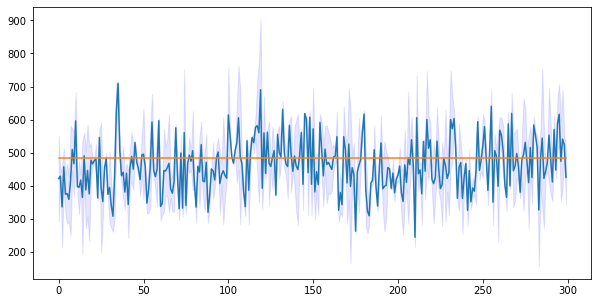

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

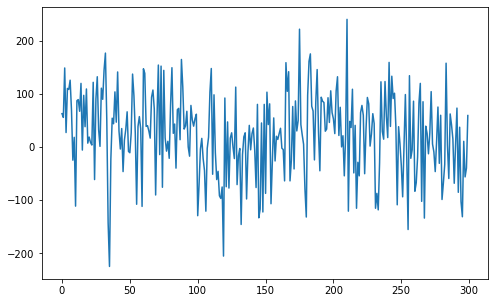

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

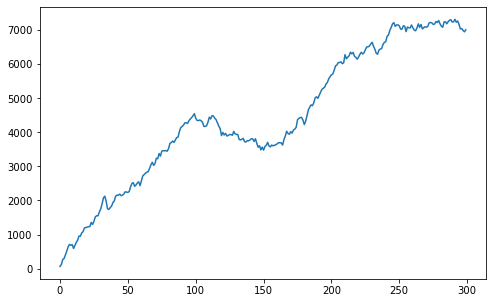

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [9]:
n_products

5

In [10]:
n_arms

4

In [11]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [12]:
array

array([[0.6, 0.4, 0.3, 0.8],
       [0.9, 0.4, 0.8, 0.2],
       [0.1, 0.3, 0.3, 0.8],
       [0.7, 0.3, 0.5, 0.8],
       [0.7, 0.3, 0.6, 0.3]])

In [13]:
randrange(0,1)

0